# Unit 7: Simulation of sampling with replacement

## 1 Introduction

This notebook simulates the activity from the previous class: 

Each team was given an envelope with an**unknown population of tiles with numbers**

### {1,2,3,4,5,6}

We randomly selected one tile from the population, took note of the number on the tile
and returned the tile back into the envelope. This type of repeated sampling from the population is known as "*sampling with replacement*".

The experiment was designed in such a way that one of the six events in the sample space has a lower probability than the remaining five events, which all have the same probability.

1. All numbers are evenly distributed: the probability of the event '*tile shows number x*' is the same for all possible numbers x.
2. One number has half the probability compared with the rest of the numbers.

The question of interest: **What is a large enough sample size so that we can distinguish between the low-probabilty event and the others. In other words, after how many trials do we have enough observations to detect a difference in the frequency of the events?** 

Suprisingly, it takes quite a few samples before the random fluctuations in the relative frequency of each event is reduced. The more samples we have in our data set, the more accurate is the estimated relative frequency for each event.



## 2. How can we simulate a random process like the sampling from a bag with tiles?

First of all, we have to be able to generate random numbers. That's possible with numpy. Numpy can generate discrete (integer) numbers with equal probability within a defined range (e.g. integers 1,2,3,4,5,6).

The function that produces evenly (uniformly) distributed integer numbers is
*np.random.randint*



In [4]:
import numpy as np
import matplotlib.pyplot as plt

help(np.random.randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

## 2.1 The basics of working with random numbers

In order to simulate the experiment of sampling from the bag of tiles we need a few parameters that control the simulation:

* define the 'event space': {1,2,3,4,5,6}, this we do here with the integer variables i1 and i2.
* we define a list with the event numbers for the plotting of the results
* it is of course a good idea to use a variable that controls the sample size


In [33]:
n=300 # sample size
i1 ,i2 = 1, 6+1
sample=np.random.randint(i1,i2,size=n)
print(sample)

[5 1 3 5 5 2 6 2 1 2 5 4 2 3 4 1 3 3 1 4 3 2 3 1 2 2 1 5 5 3 6 5 3 6 3 1 3
 4 4 1 1 3 2 3 2 3 4 5 4 1 1 6 5 6 1 4 4 4 4 6 4 6 2 4 2 1 3 1 5 2 4 6 2 5
 6 2 1 4 4 3 3 2 4 1 1 4 2 2 3 2 2 4 1 6 4 3 4 5 1 4 1 6 4 1 5 6 6 1 2 3 4
 3 1 5 1 3 2 1 5 5 5 2 1 3 6 4 5 4 1 5 3 2 6 5 2 4 1 1 6 2 1 1 6 4 1 4 1 1
 2 1 4 1 4 4 6 6 4 2 1 2 4 2 3 3 1 4 4 2 2 6 1 3 1 3 5 2 1 4 5 4 1 1 2 6 4
 2 4 1 3 3 6 6 1 5 2 6 2 2 3 3 3 5 3 4 2 1 2 3 1 1 4 2 6 3 3 6 4 3 4 6 4 6
 2 5 5 5 3 3 1 6 4 5 5 6 4 6 1 6 5 4 3 4 3 3 5 1 4 6 4 5 3 5 5 4 1 5 6 3 5
 6 1 3 5 2 4 4 2 2 4 2 1 5 3 1 2 3 1 6 5 4 5 1 6 5 6 1 6 1 3 6 3 3 4 2 6 6
 5 2 2 6]


## 2.2 Calculate relative frequencies

Function *np.histogram* allows us to calculate the frequency of events falling into a specific value range.
That range is defined by the lower and upper boundaries of the bins.


In [34]:
# for the histograms we need the control of the bins
event=      [    1,    2,    3,    4,    5,    6    ]
# Note the borders for our bins (event ranges)
bin_borders=[0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]
# we can get the numerical results
result=np.histogram(sample,bins=bin_borders)
count=result[0] # first item in  returned list has the counts for each bin
rel_freq=count/sum(count)



## 2.3 Text-based summary of the results 
(e.g. for tables in research reports)

In [35]:
i=0
print ("counts and relative frequency of the events")
while i<len(count):
    print ("tile="+str(event[i])+", "+str(count[i])+", "+str(rel_freq[i]))
    i=i+1
print ("----------------")
print ("checksum : "+str(sum(rel_freq)))

counts and relative frequency of the events
tile=1, 59, 0.19666666666666666
tile=2, 49, 0.16333333333333333
tile=3, 50, 0.16666666666666666
tile=4, 57, 0.19
tile=5, 42, 0.14
tile=6, 43, 0.14333333333333334
----------------
checksum : 0.9999999999999999


## 2.4 Histogram plot 

Aside from the long parameter list that allows us to adjust the colors of the plot, there is one important optional parameter to switch into the mode showing relative frequencies: *density=True*

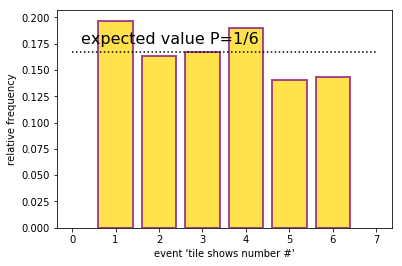

In [36]:
plt.hist(sample,bins=bin_borders,rwidth=0.8,lw=2,edgecolor='purple',facecolor='gold',alpha=0.7,density=True)
plt.ylabel("relative frequency")
plt.xlabel("event 'tile shows number #'")
plt.text(0.2,0.175, 'expected value P=1/6',fontsize=16)
plt.plot([0,7],[1/6, 1/6],':',color='black')

## 3. Summary

* Numpy offers random number generators that produce discrete events (integer numbers) with equal probability (*np.random.randint*). We use the function to simulate the class experiment: 'sampling tiles from an evenlope with even distribution of all numbers'. 
* Numpy has a function (*np.histogram*) that calculates the frequency of events (integer or real numbers) falling inside a certain bin (range of values)


## 4. Next steps

We cannot simulate the experiment with a population with non-uniform distribution. One solution how we can do this with the same numpy function will be shown in the next notebook.